In [1]:
!pip install windpowerlib

   ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/74.8 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/74.8 kB 325.1 kB/s eta 0:00:01
   --------------------- ------------------ 41.0/74.8 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 74.8/74.8 kB 414.1 kB/s eta 0:00:00


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import ModelChain, WindTurbine
from windpowerlib import data as wt

In [94]:
data=pd.read_csv('weather-montreal.csv',index_col=0, header=[0,1], date_parser=lambda idx:pd.to_datetime(idx,utc=True))

C:\Users\MAK POWER\AppData\Local\Temp\ipykernel_6968\3180670114.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data=pd.read_csv('weather-montreal.csv',index_col=0, header=[0,1], date_parser=lambda idx:pd.to_datetime(idx,utc=True))


In [96]:
data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


In [98]:
# First we need to select Wind Turbine
Turbine_Type= wt.get_turbine_types(print_out=False)
Turbine_Type

C:\Users\MAK POWER\anaconda3\Lib\site-packages\windpowerlib\data.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


,manufacturer,turbine_type,has_power_curve,has_cp_curve
0,Adwen/Areva,AD116/5000,True,False
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True
...,...,...,...,...
62,Vestas,V80/2000,True,False
63,Vestas,V90/2000,True,True
64,Vestas,V90/2000/GS,True,True
65,Vestas,V90/3000,True,False


In [100]:
print(Turbine_Type[Turbine_Type["manufacturer"].str.contains("Enercon")])

   manufacturer turbine_type  has_power_curve  has_cp_curve
1       Enercon   E-101/3050             True          True
2       Enercon   E-101/3500             True          True
3       Enercon   E-115/3000             True          True
4       Enercon   E-115/3200             True          True
5       Enercon   E-126/4200             True          True
6       Enercon   E-126/7500             True         False
7       Enercon   E-126/7580             True         False
8       Enercon   E-141/4200             True          True
9       Enercon     E-53/800             True          True
10      Enercon    E-70/2000             True         False
11      Enercon    E-70/2300             True          True
12      Enercon    E-82/2000             True          True
13      Enercon    E-82/2300             True          True
14      Enercon    E-82/2350             True          True
15      Enercon    E-82/3000             True          True
16      Enercon    E-92/2350            

In [102]:
print(Turbine_Type[Turbine_Type["turbine_type"].str.contains("E48")])

   manufacturer turbine_type  has_power_curve  has_cp_curve
17      Enercon      E48/800             True          True


In [104]:
selected_turbine= {'turbine_type':'E48/800', 'hub_height':60}

In [168]:
turbine=WindTurbine(**selected_turbine)
turbine

Wind turbine: E48/800 ['nominal power=800000.0 W', 'hub height=60 m', 'rotor diameter=48.0 m', 'power_coefficient_curve=True', 'power_curve=True']

In [134]:
Turbine_submodels= {
    'wind_speed_model':'hellman',
    'density_model':'ideal_gas',
    'temperature_model':'linear_gradient',
    'power_output_model':'power_curve',
    'density_correction':True,
    'obstacle_height':0,
    'hellman_exp':0.25 #wooded countryside
}

In [136]:
Turbine_submodels

{'wind_speed_model': 'hellman',
 'density_model': 'ideal_gas',
 'temperature_model': 'linear_gradient',
 'power_output_model': 'power_curve',
 'density_correction': True,
 'obstacle_height': 0,
 'hellman_exp': 0.25}

In [138]:
Model=ModelChain(turbine,**Turbine_submodels).run_model(data)

In [140]:
Turbine_Power_Output=(Model.power_output)/1000
Turbine_Power_Output

2019-01-01 00:00:00+00:00    610.887435
2019-01-01 01:00:00+00:00    637.450320
2019-01-01 02:00:00+00:00    527.086482
2019-01-01 03:00:00+00:00    170.394831
2019-01-01 04:00:00+00:00      2.012092
                                ...    
2019-12-31 19:00:00+00:00     30.694634
2019-12-31 20:00:00+00:00     58.813546
2019-12-31 21:00:00+00:00    163.386687
2019-12-31 22:00:00+00:00    295.995062
2019-12-31 23:00:00+00:00    275.971883
Name: feedin_power_plant, Length: 8760, dtype: float64

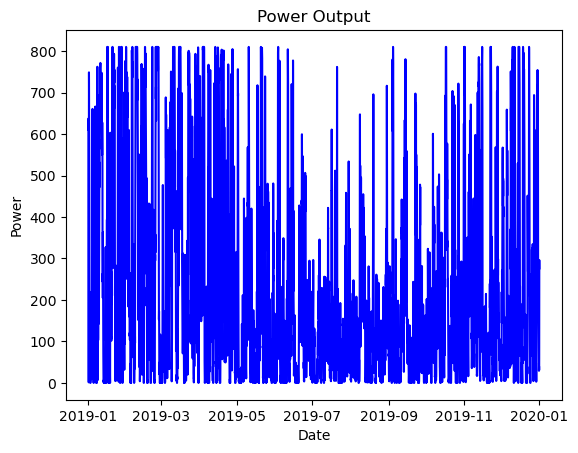

In [142]:
plt.plot(Turbine_Power_Output, color='blue')
plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Power Output')
plt.show()

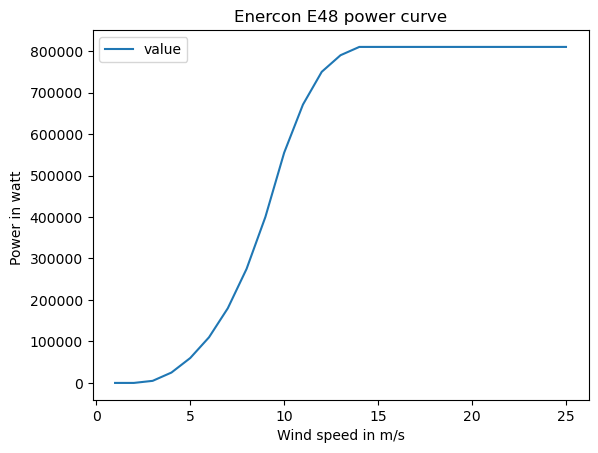

In [182]:
if plt:
    if turbine.power_curve is not None:
        turbine.power_curve.plot(
            x='wind_speed', y='value',
            title='Enercon E48 power curve')
        plt.xlabel('Wind speed in m/s')
        plt.ylabel('Power in watt ')
        plt.show()